In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import MobileNetV2
import seaborn as sn

In [17]:
# Model configuration
num_classes = 5
IMAGE_SHAPE = [224, 224]  # Input shape for MobileNetV2
batch_size = 32
epochs = 5


In [18]:
# Load MobileNetV2 model with pre-trained ImageNet weights
mobilenet = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)


In [19]:
# Freeze the layers
for layer in mobilenet.layers:
    layer.trainable = False

In [20]:
# Add custom layers on top of the MobileNetV2 base
x = Flatten()(mobilenet.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [21]:
# Define the model
model = Model(inputs=mobilenet.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Data generators
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Training",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Testing",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)


Found 721 images belonging to 5 classes.
Found 181 images belonging to 5 classes.


In [26]:
# Training
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.samples / batch_size)),
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(test_data_gen.samples / batch_size)),
    epochs=epochs,
    verbose=1
)
print('Training Completed!')

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.4050 - loss: 9.5434 - val_accuracy: 0.8564 - val_loss: 3.3987
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7437 - loss: 3.4370 - val_accuracy: 0.8066 - val_loss: 2.1529
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9112 - loss: 2.0438 - val_accuracy: 0.9613 - val_loss: 0.2766
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9309 - loss: 0.8888 - val_accuracy: 0.9613 - val_loss: 0.5514
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 949ms/step - accuracy: 0.9433 - loss: 2.9014 - val_accuracy: 0.9724 - val_loss: 0.9343
Training Completed!


In [27]:
# Predictions and evaluation
Y_pred = model.predict(test_data_gen, test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes
print(metrics.classification_report(val_trues, val_preds))

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.95      0.91        22
           2       1.00      0.81      0.89        21
           3       0.98      1.00      0.99       105
           4       1.00      1.00      1.00        23

    accuracy                           0.97       181
   macro avg       0.97      0.95      0.96       181
weighted avg       0.97      0.97      0.97       181



Text(95.72222222222221, 0.5, 'Truth')

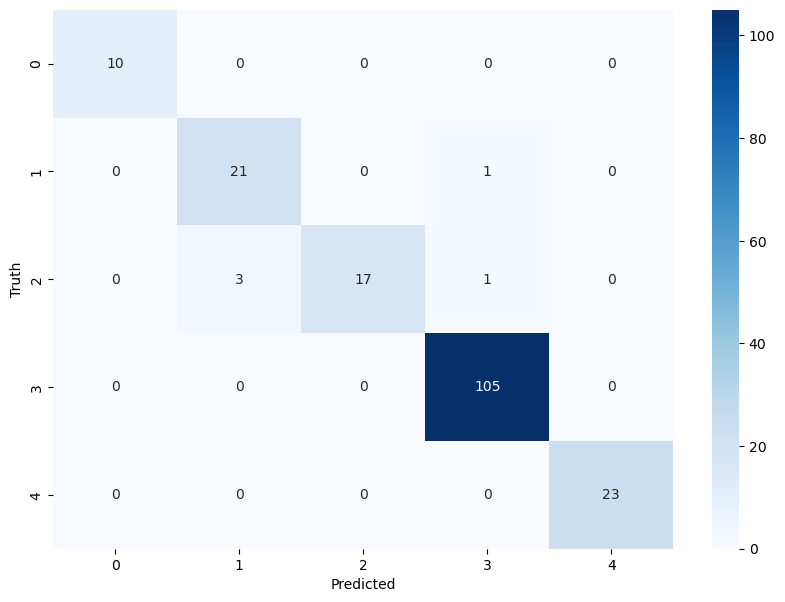

In [28]:
# Confusion Matrix
cm = metrics.confusion_matrix(val_trues, val_preds)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
# Save model
keras_file = "C:/Users/91939/Downloads/LALITH/mobilenetv2.h5"
tf.keras.models.save_model(model, keras_file)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50
import seaborn as sn

In [28]:
# Model configuration
num_classes = 5
IMAGE_SHAPE = [224, 224]  # Input shape for ResNet50
batch_size = 32
epochs = 5

In [29]:
# Load ResNet50 model with pre-trained ImageNet weights
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [30]:
# Freeze the layers
for layer in resnet.layers:
    layer.trainable = False

In [31]:
# Add custom layers on top of the ResNet50 base
x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [32]:
# Define the model
model = Model(inputs=resnet.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Data generators
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP_data/Training",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP_data/Testing",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)

Found 721 images belonging to 5 classes.
Found 181 images belonging to 5 classes.


In [34]:
# Training
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.samples / batch_size)),
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(test_data_gen.samples / batch_size)),
    epochs=epochs,
    verbose=1
)
print('Training Completed!')

C:\Users\91939\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5951 - loss: 25.9310 - val_accuracy: 0.8785 - val_loss: 2.2939
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8986 - loss: 1.9210 - val_accuracy: 0.9724 - val_loss: 0.8704
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9599 - loss: 0.8387 - val_accuracy: 0.9834 - val_loss: 0.0356
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9586 - loss: 0.2331 - val_accuracy: 0.9834 - val_loss: 0.2416
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9669 - loss: 0.2260 - val_accuracy: 0.9945 - val_loss: 0.0467
Training Completed!


In [35]:
# Predictions and evaluation
Y_pred = model.predict(test_data_gen, test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes
print(metrics.classification_report(val_trues, val_preds))

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        22
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00       105
           4       0.96      1.00      0.98        23

    accuracy                           0.99       181
   macro avg       0.99      0.99      0.99       181
weighted avg       0.99      0.99      0.99       181



In [36]:
# Confusion Matrix
cm = metrics.confusion_matrix(val_trues, val_preds)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

In [37]:
cm

array([[ 10,   0,   0,   0,   0],
       [  0,  22,   0,   0,   0],
       [  0,   0,  20,   0,   1],
       [  0,   0,   0, 105,   0],
       [  0,   0,   0,   0,  23]], dtype=int64)

In [38]:
#Save model
keras_file = "C:/Users/91939/Downloads/LALITH/resnet50_19-04-2025_new.h5"
tf.keras.models.save_model(model, keras_file)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet101
import seaborn as sn

In [49]:
# Model configuration
num_classes = 5
IMAGE_SHAPE = [224, 224]  # Input shape for ResNet101
batch_size = 32
epochs = 5

In [50]:
# Load ResNet101 model with pre-trained ImageNet weights
resnet = ResNet101(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [51]:
# Freeze the layers
for layer in resnet.layers:
    layer.trainable = False

In [55]:
# Add custom layers on top of the ResNet101 base
x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [56]:
# Define the model
model = Model(inputs=resnet.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
# Data generators
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Training",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Testing",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)

Found 721 images belonging to 5 classes.
Found 181 images belonging to 5 classes.


In [58]:
# Training
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.samples / batch_size)),
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(test_data_gen.samples / batch_size)),
    epochs=epochs,
    verbose=1
)
print('Training Completed!')

C:\Users\91939\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7392 - loss: 35.8506 - val_accuracy: 0.8785 - val_loss: 5.8333
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9065 - loss: 3.1000 - val_accuracy: 0.9613 - val_loss: 0.4714
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9201 - loss: 1.1318 - val_accuracy: 0.9779 - val_loss: 0.0895
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9804 - loss: 0.6744 - val_accuracy: 0.9945 - val_loss: 0.0083
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9991 - loss: 0.0085 - val_accuracy: 0.9834 - val_loss: 0.0376
Training Completed!


In [59]:
# Predictions and evaluation
Y_pred = model.predict(test_data_gen, test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes
print(metrics.classification_report(val_trues, val_preds))

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        22
           2       0.91      1.00      0.95        21
           3       0.99      1.00      1.00       105
           4       1.00      0.96      0.98        23

    accuracy                           0.98       181
   macro avg       0.98      0.97      0.98       181
weighted avg       0.98      0.98      0.98       181



Text(95.72222222222221, 0.5, 'Truth')

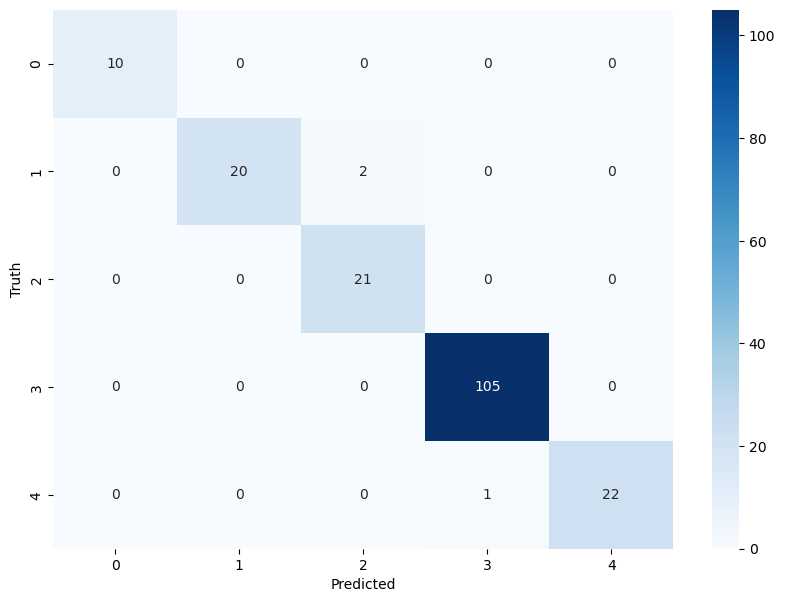

In [60]:
# Confusion Matrix
cm = metrics.confusion_matrix(val_trues, val_preds)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
#Save model
keras_file = "C:/Users/91939/Downloads/LALITH/resnet101.h5"
tf.keras.models.save_model(model, keras_file)

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import DenseNet121
import seaborn as sn

In [68]:
# Model configuration
num_classes = 5
IMAGE_SHAPE = [224, 224]  # Input shape for DenseNet121
batch_size = 32
epochs = 5

In [69]:
# Load DenseNet121 model with pre-trained ImageNet weights
densenet = DenseNet121(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [70]:
# Freeze the layers
for layer in resnet.layers:
    layer.trainable = False

In [72]:
# Add custom layers on top of the DenseNet121 base
x = Flatten()(densenet.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [73]:
# Define the model
model = Model(inputs=densenet.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
# Data generators
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Training",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Testing",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)

Found 721 images belonging to 5 classes.
Found 181 images belonging to 5 classes.


In [75]:
# Training
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.samples / batch_size)),
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(test_data_gen.samples / batch_size)),
    epochs=epochs,
    verbose=1
)
print('Training Completed!')

C:\Users\91939\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.3148 - loss: 24.4060 - val_accuracy: 0.1160 - val_loss: 74.6848
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.8017 - loss: 1.0283 - val_accuracy: 0.1602 - val_loss: 3460.0564
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.6126 - loss: 1.4268 - val_accuracy: 0.5635 - val_loss: 385.7773
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.4465 - loss: 4.2933 - val_accuracy: 0.1547 - val_loss: 5199423.0000
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.7033 - loss: 1.4010 - val_accuracy: 0.3591 - val_loss: 22326.9316
Training Completed!


In [76]:
# Predictions and evaluation
Y_pred = model.predict(test_data_gen, test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes
print(metrics.classification_report(val_trues, val_preds))

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step 
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        10
           1       0.02      0.05      0.03        22
           2       0.28      0.33      0.30        21
           3       0.56      0.48      0.51       105
           4       0.00      0.00      0.00        23

    accuracy                           0.36       181
   macro avg       0.25      0.31      0.27       181
weighted avg       0.38      0.36      0.36       181



C:\Users\91939\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91939\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(95.72222222222221, 0.5, 'Truth')

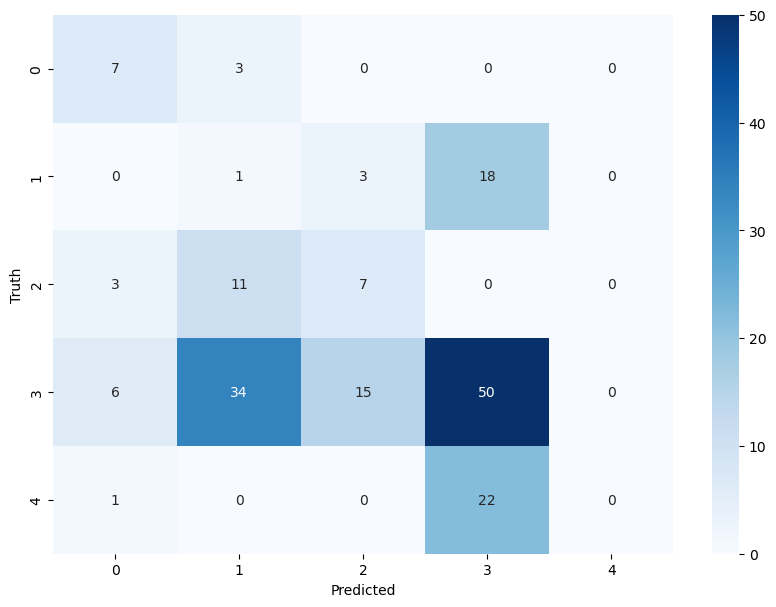

In [77]:
# Confusion Matrix
cm = metrics.confusion_matrix(val_trues, val_preds)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
#Save model
keras_file = "C:/Users/91939/Downloads/LALITH/densenet121.h5"
tf.keras.models.save_model(model, keras_file)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import InceptionV3
import seaborn as sn

In [6]:
# Model configuration
num_classes = 5
IMAGE_SHAPE = [224, 224]  # Input shape for InceptionV3
batch_size = 32
epochs = 5

In [7]:
# Load InceptionV3 model with pre-trained ImageNet weights
inception = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [8]:
# Freeze the layers
for layer in inception.layers:
    layer.trainable = False

In [9]:
# Add custom layers on top of the inceptionv3 base
x = Flatten()(inception.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [11]:
# Define the model
model = Model(inputs=inception.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Data generators
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Training",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(
    directory="C:/Users/91939/Downloads/LALITH/SDP/Testing",
    target_size=IMAGE_SHAPE,
    shuffle=False,
    class_mode='categorical'
)

Found 721 images belonging to 5 classes.
Found 181 images belonging to 5 classes.


In [13]:
# Training
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.samples / batch_size)),
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(test_data_gen.samples / batch_size)),
    epochs=epochs,
    verbose=1
)
print('Training Completed!')

C:\Users\91939\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.4481 - loss: 245.6803 - val_accuracy: 0.5249 - val_loss: 77.6847
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8518 - loss: 19.5183 - val_accuracy: 0.7680 - val_loss: 39.8096
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8481 - loss: 18.1759 - val_accuracy: 0.7680 - val_loss: 89.1480
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8366 - loss: 45.3485 - val_accuracy: 0.9171 - val_loss: 8.8629
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9374 - loss: 3.5023 - val_accuracy: 0.9448 - val_loss: 7.5272
Training Completed!


In [14]:
# Predictions and evaluation
Y_pred = model.predict(test_data_gen, test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes
print(metrics.classification_report(val_trues, val_preds))

6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.94      0.77      0.85        22
           2       0.95      0.95      0.95        21
           3       0.95      1.00      0.98       105
           4       0.95      0.83      0.88        23

    accuracy                           0.94       181
   macro avg       0.93      0.91      0.91       181
weighted avg       0.95      0.94      0.94       181



Text(95.72222222222221, 0.5, 'Truth')

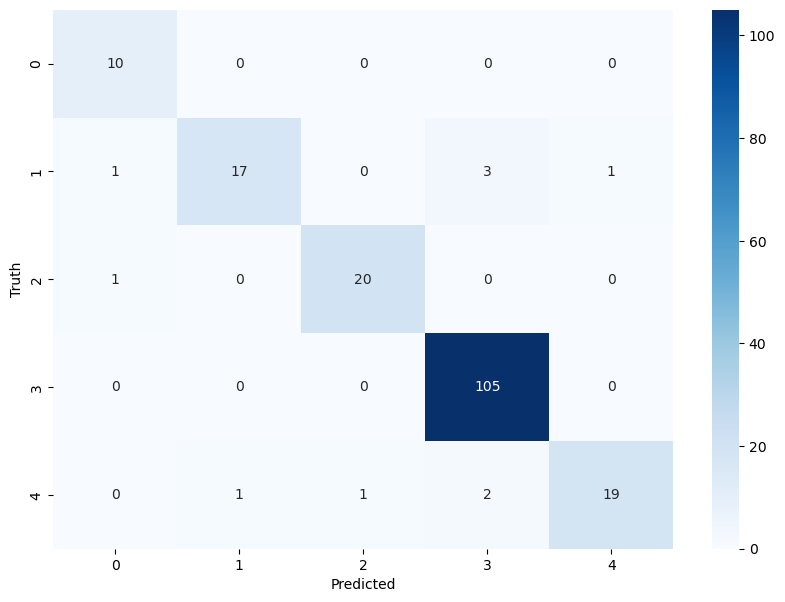

In [15]:
# Confusion Matrix
cm = metrics.confusion_matrix(val_trues, val_preds)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
#Save model
keras_file = "C:/Users/91939/Downloads/LALITH/inceptionv3.h5"
tf.keras.models.save_model(model, keras_file)

In [ ]:
###########################

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet101
from sklearn.metrics import classification_report, confusion_matrix
import gradio as gr
import os

In [7]:
!pip install gradio

In [8]:
# Load the trained model
loaded_model = load_model("C:/Users/91939/Downloads/LALITH/resnet50_19-04-2025_new.h5")
print("✅ Model Loaded!")

✅ Model Loaded!


In [16]:
def predict_image(img):
    img = img.resize(IMAGE_SHAPE)  # Resize image
    img = np.array(img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dimensions for batch processing
    
    prediction = loaded_model.predict(img)
    print(prediction)
    predicted_class = class_labels[np.argmax(prediction)]  # Get class label
    
    return f"Predicted Class: {predicted_class}"

IMAGE_SHAPE = (224, 224)

#class_labels = [1700,1492,1937,1290,1364]
class_labels = [1364,1492,1937,1290,1700]

# Create Gradio Interface
gradio_interface = gr.Interface(
    fn=predict_image, 
    inputs=gr.Image(type="pil"), 
    outputs="text",
    title="GUI for Author Recognition",
    description="Upload an image and the model will predict which scholar it belongs to."
)

# Launch Gradio App
gradio_interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7867
* Running on public URL: https://a9998e207cd9b207c3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[7.0605970e-14 3.8287428e-05 3.0627901e-02 5.0802970e-01 4.6130416e-01]]
Created dataset file at: .gradio\flagged\dataset1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[8.9154148e-15 9.8709834e-06 5.7163481e-03 5.0093982e-02 9.4417983e-01]]
